## Работа с графиками и визуализацией данных

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vehicles_us.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  date_posted   51525 non-null  object 
 11  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 4.7+ MB


In [ ]:
# plt.style.use('seaborn-v0_8')
# sns.set_palette("deep")

In [11]:
mean_price = df['price'].mean()
df['price_new'] = df['price'].apply(lambda x: x if x<75000 else mean_price)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


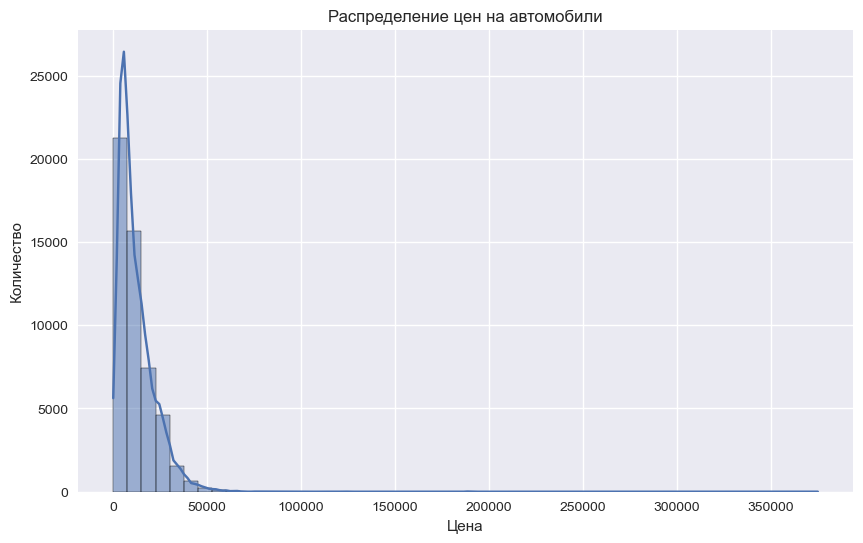

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

In [ ]:
mean_price = df['price'].mean()
df['price_new'] = df['price'].apply(lambda x: x if x<75000 else mean_price)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


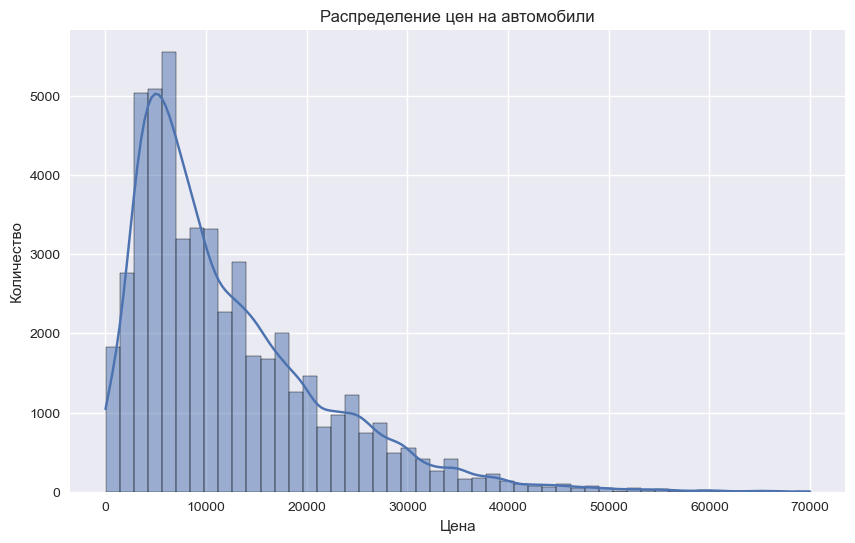

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_new'], bins=50, kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

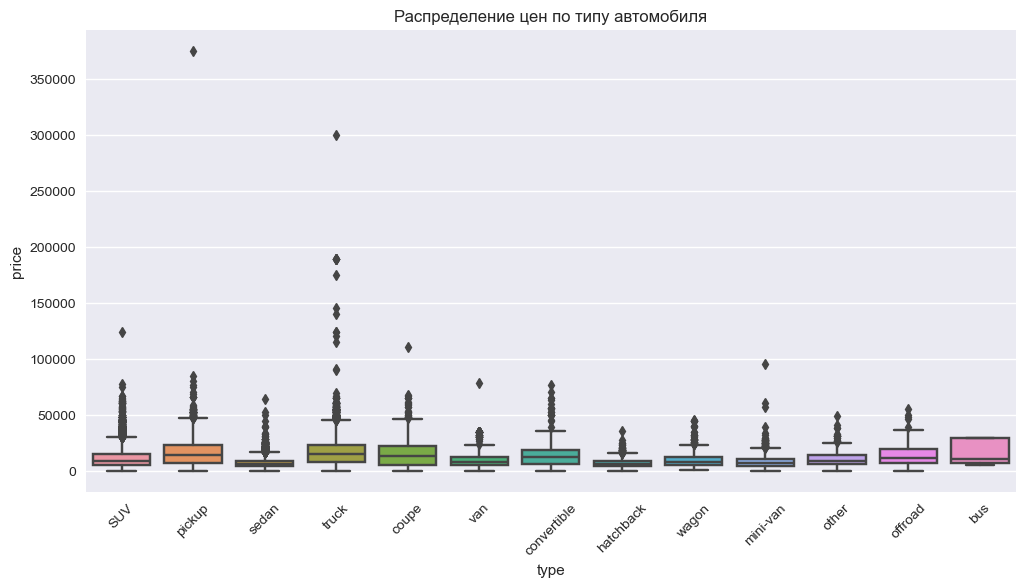

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=df)
plt.title('Распределение цен по типу автомобиля')
plt.xticks(rotation=45)
plt.show()

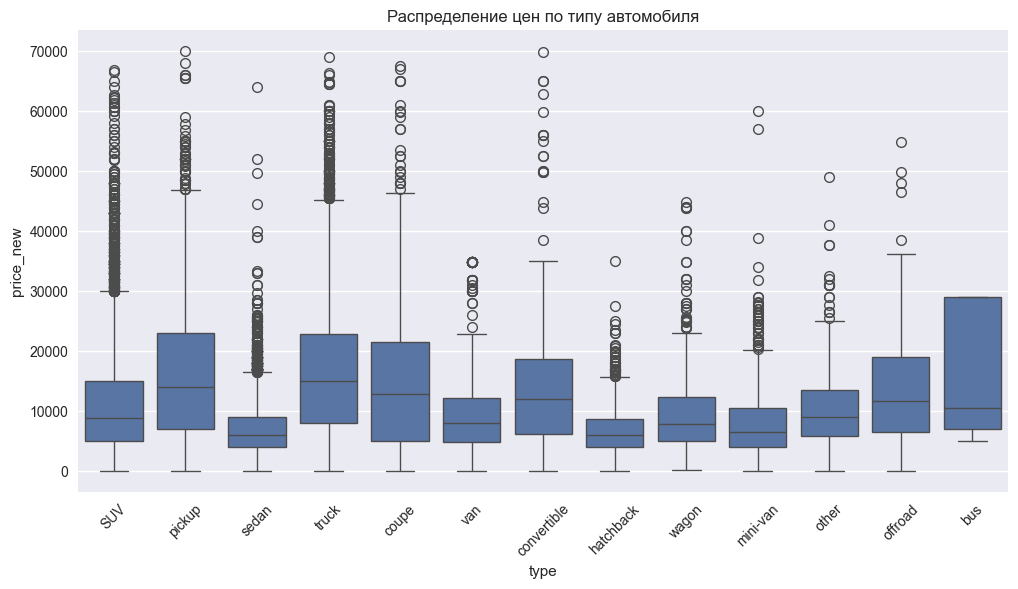

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price_new', data=df)
plt.title('Распределение цен по типу автомобиля')
plt.xticks(rotation=45)
plt.show()

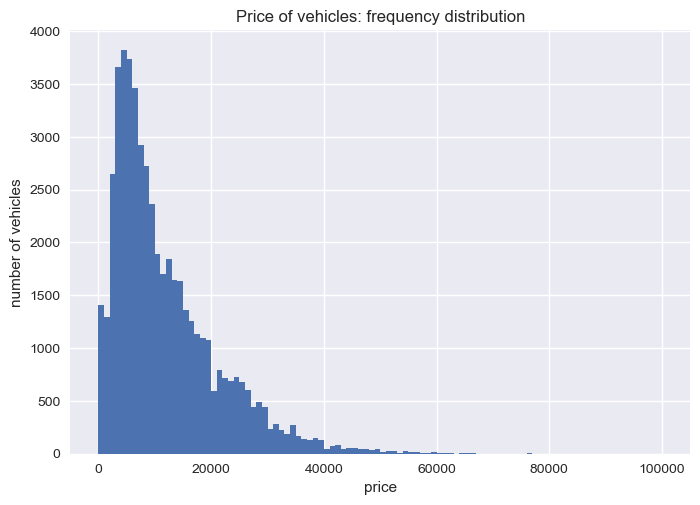

In [15]:
df.hist('price', bins=100, range=(0,100000))
plt.title('Price of vehicles: frequency distribution')

plt.xlabel('price')
plt.ylabel('number of vehicles');

In [30]:
df['model'].value_counts()

# def brand(row):
#     model = row['model']
#     model_split = model.split(' ')
#     brand = model_split[0]
#     return brand

# df['brand'] = df.apply(brand, axis=1)
# df['brand'].value_counts()


model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

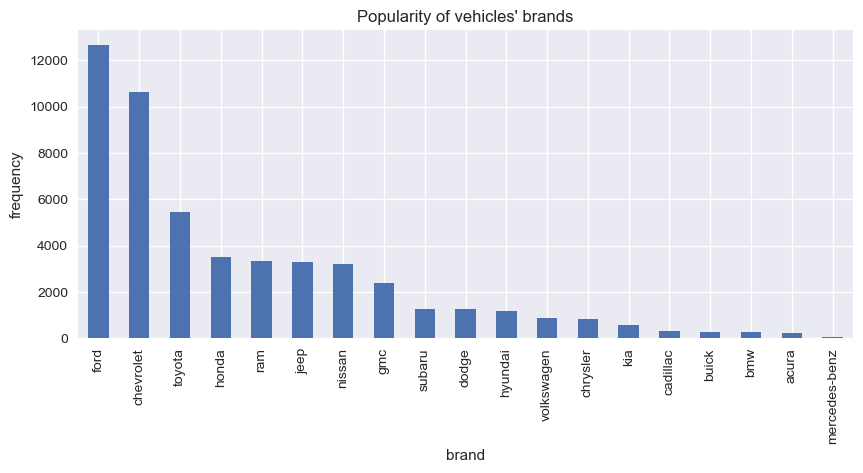

In [18]:
df['brand'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title("Popularity of vehicles' brands")
plt.xlabel('brand')
plt.ylabel('frequency');

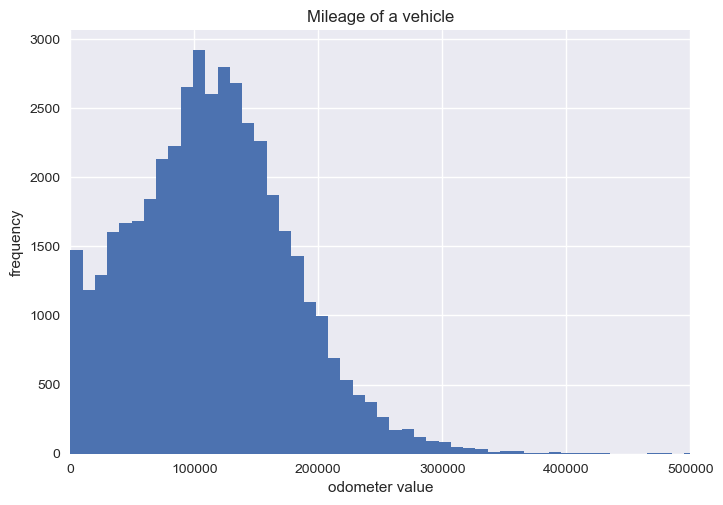

In [19]:
df['odometer'].dropna().astype('int').hist(bins=100)
plt.xlim(0,500000)
plt.title("Mileage of a vehicle")
plt.xlabel('odometer value')
plt.ylabel('frequency');

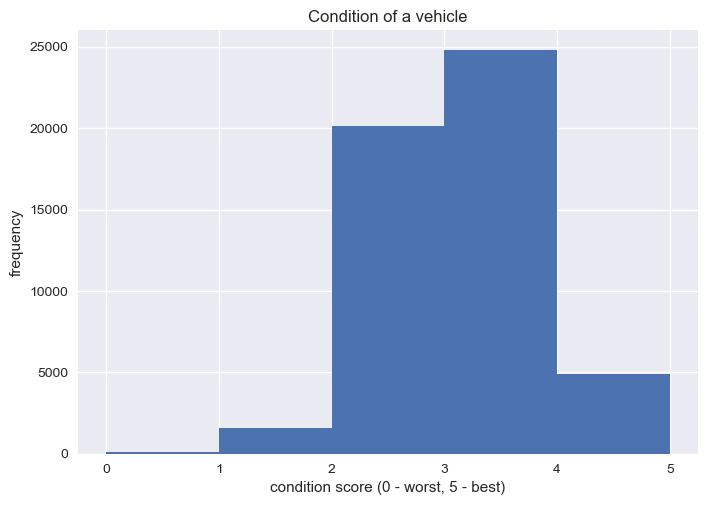

In [20]:
condition_dict = {5:'new', 4:'like new', 3:'excellent', 2:'good', 1:'fair', 0:'salvage'}
def get_key(val):
    for key, value in condition_dict.items(): 
        if val in value: 
            return key
def condition_num(row):
    if row['condition'] in condition_dict.values():
        return get_key(row['condition'])
df['condition'] = df.apply(condition_num, axis=1)
df['condition'].value_counts()

df.hist('condition', bins=5)
plt.title("Condition of a vehicle")
plt.xlabel('condition score (0 - worst, 5 - best)')
plt.ylabel('frequency');

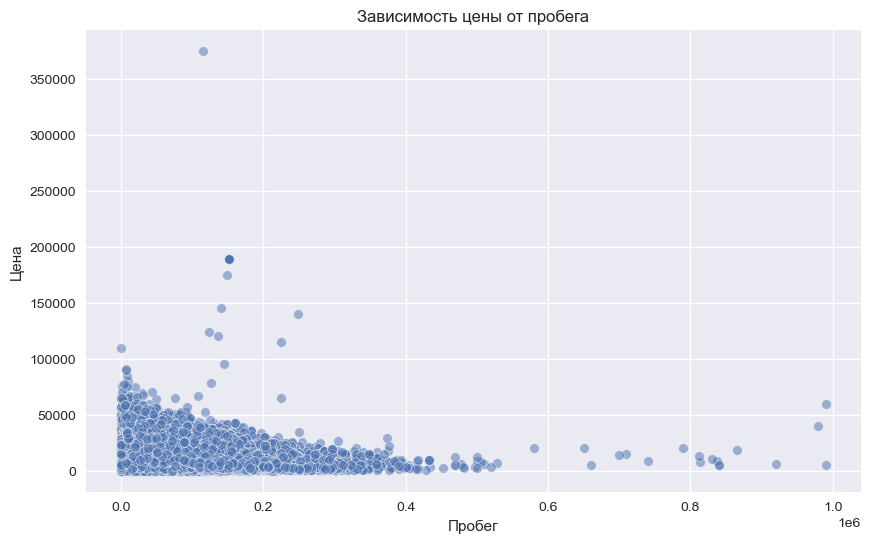

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.show()

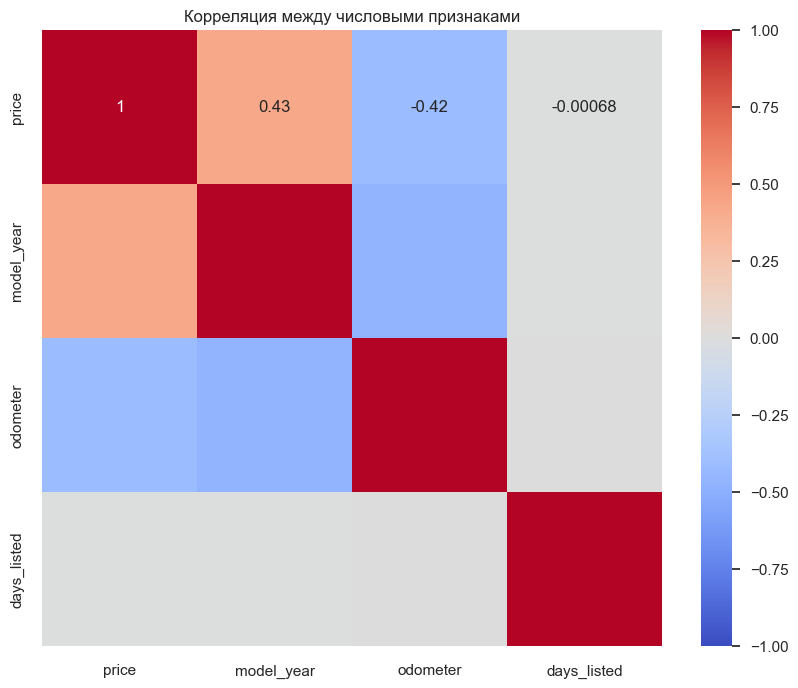

'Этот график поможет нам увидеть, какие числовые\n признаки наиболее сильно коррелируют друг с другом.'

In [34]:
numeric_cols = ['price', 'model_year', 'odometer', 'days_listed']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляция между числовыми признаками')
plt.show()


'''Этот график поможет нам увидеть, какие числовые
 признаки наиболее сильно коррелируют друг с другом.'''

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,price_new,brand
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,2018-06-23,19,9400.0,bmw
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,2018-10-19,50,25500.0,ford
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79,5500.0,hyundai
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,NaN,2019-03-22,9,1500.0,ford
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28,14900.0,chrysler


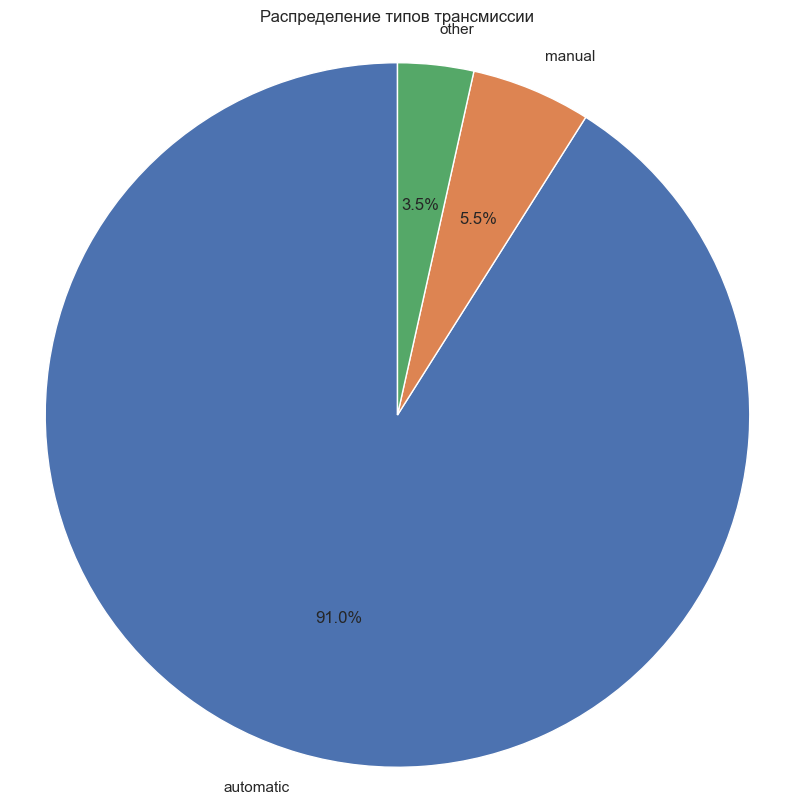

In [33]:
transmission_counts = df['transmission'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(transmission_counts.values, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение типов трансмиссии')
plt.axis('equal')
plt.show()